In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [3]:
df = pd.read_csv('in_case2.csv')

In [8]:
df.head()

,id,age,race,sex,diagnosed,site,stage,surgery,sequence_num,malignant_num,benign_num,property,survive
0,18477,15,White,Male,1980,Bones and Joints,Regional,No,One primary only,1.0,0.0,Uknown,dead in 5
1,70400,14,White,Female,1977,Bones and Joints,Distant,No,One primary only,1.0,0.0,Uknown,dead in 5
2,81204,18,White,Male,1980,Bones and Joints,Localized,No,One primary only,1.0,0.0,Uknown,survive
3,82818,19,White,Male,1979,Bones and Joints,Localized,No,One primary only,1.0,0.0,Uknown,survive
4,106645,14,White,Female,1979,Bones and Joints,Localized,Yes,1st of 2 or more primaries,2.0,0.0,Uknown,survive


In [6]:
df.drop("status", axis=1, inplace=True)
df.drop("months", axis=1, inplace=True)

df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df.drop("years", axis=1, inplace=True)

In [9]:
df['race'] = df['race'].astype('category').cat.codes
df['sex'] = df['sex'].astype('category').cat.codes
df['site'] = df['site'].astype('category').cat.codes
df['stage'] = df['stage'].astype('category').cat.codes
df['surgery'] = df['surgery'].astype('category').cat.codes
df['sequence_num'] = df['sequence_num'].astype('category').cat.codes
df['property'] = df['property'].astype('category').cat.codes
df['survive'] = df['survive'].astype('category').cat.codes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2326 non-null   int64  
 1   age            2326 non-null   int64  
 2   race           2326 non-null   int8   
 3   sex            2326 non-null   int8   
 4   diagnosed      2326 non-null   int64  
 5   site           2326 non-null   int8   
 6   stage          2326 non-null   int8   
 7   surgery        2326 non-null   int8   
 8   sequence_num   2326 non-null   int8   
 9   malignant_num  2326 non-null   float64
 10  benign_num     2326 non-null   float64
 11  property       2326 non-null   int8   
 12  survive        2326 non-null   int8   
dtypes: float64(2), int64(3), int8(8)
memory usage: 109.2 KB


### Podjela na trening i test podatke

In [11]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(df, test_size=0.20, random_state=35)

In [12]:
test

,id,age,race,sex,diagnosed,site,stage,surgery,sequence_num,malignant_num,benign_num,property,survive
1586,43990663,8,21,0,2005,24,1,2,3,1.0,0.0,5,5
2309,75594518,19,21,0,2014,1,0,0,3,1.0,0.0,1,5
333,10441682,17,21,1,1988,1,1,1,3,1.0,0.0,10,4
74,848211,16,13,0,2001,1,2,0,3,1.0,0.0,8,5
1498,43420808,19,21,1,2002,24,1,0,3,1.0,0.0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,28432881,16,21,1,2013,1,2,0,3,1.0,0.0,4,5
2160,66707482,15,21,0,2014,1,1,2,3,1.0,0.0,8,5
1680,44555178,18,21,0,2009,1,0,0,3,1.0,0.0,7,4
489,17111195,15,21,1,1982,1,0,2,3,1.0,0.0,10,4


In [13]:
List_Of_Categories_In_Column=list(df['race'].value_counts().index)
List_Of_Categories_In_Column

[21, 3, 0, 13, 7, 5, 2, 4, 19, 1, 10, 20, 12, 17, 16, 15, 18, 14, 8, 6, 9, 11]

## SVM sa rbf karnelom

In [14]:
from sklearn import svm

clf_svm = svm.SVC(kernel='rbf')

In [15]:
features = training.drop(["survive"], axis=1).columns
print(features)

Index(['id', 'age', 'race', 'sex', 'diagnosed', 'site', 'stage', 'surgery',
       'sequence_num', 'malignant_num', 'benign_num', 'property'],
      dtype='object')


In [16]:
scaler = preprocessing.StandardScaler().fit(training[features])

In [17]:
features_nomalizovane = scaler.transform(training[features])
print(features_nomalizovane)

[[-1.62965829 -0.04656642  0.32413774 ... -0.22413534 -0.03280894
   1.47242378]
 [-1.15438173  0.57655263  0.32413774 ... -0.22413534 -0.03280894
   1.47242378]
 [ 2.02750885  0.78425898  0.32413774 ... -0.22413534 -0.03280894
  -0.86435799]
 ...
 [-0.27737145 -0.66968547  0.32413774 ... -0.22413534 -0.03280894
  -0.08543073]
 [ 0.07787372 -2.53904263  0.32413774 ... -0.22413534 -0.03280894
  -0.47489436]
 [ 0.54380198  0.16113993  0.32413774 ... -0.22413534 -0.03280894
  -0.47489436]]


In [18]:
clf_svm.fit(features_nomalizovane, training['survive'])

SVC()

In [19]:
clf_svm.predict(scaler.transform([test[features].iloc[0]]))

array([5], dtype=int8)

## Tacnost modela

In [20]:
clf_svm.score(scaler.transform(test[features]), test['survive'])

0.7124463519313304

## f mera za tacnost

In [21]:
svm_predictions = clf_svm.predict(scaler.transform(test[features]))

from sklearn.metrics import f1_score

f1_score(test['survive'], svm_predictions, average=None)

array([0.        , 0.        , 0.        , 0.55970149, 0.803125  ])

In [22]:
from sklearn.metrics import classification_report

print(classification_report(test['survive'],svm_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         4
           4       0.63      0.50      0.56       149
           5       0.74      0.88      0.80       293

    accuracy                           0.71       466
   macro avg       0.27      0.28      0.27       466
weighted avg       0.67      0.71      0.68       466



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,weights='distance')

knn.fit(features_nomalizovane, training['survive'])

KNeighborsClassifier(weights='distance')

In [24]:
test_features_nomalizovane = scaler.transform(test[features])

In [25]:
print(classification_report(test['survive'], knn.predict(test_features_nomalizovane)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         0
           4       0.53      0.50      0.51       149
           5       0.73      0.77      0.75       293

    accuracy                           0.65       466
   macro avg       0.21      0.21      0.21       466
weighted avg       0.63      0.65      0.64       466



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## stablo odlucivanja ne zahteva normalizaciju


In [26]:
from sklearn import tree

dtree_clf = tree.DecisionTreeClassifier(max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree_clf = dtree_clf.fit(training[features], training['survive'])

In [27]:
print(classification_report(test['survive'], dtree_clf.predict(test[features])))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         4
           4       0.59      0.40      0.48       149
           5       0.71      0.88      0.79       293

    accuracy                           0.68       466
   macro avg       0.26      0.26      0.25       466
weighted avg       0.63      0.68      0.65       466



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.13271
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.42203
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.41864
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.02661
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'age'),
  Text(2, 0, 'race'),
  Text(3, 0, 'sex'),
  Text(4, 0, 'diagnosed'),
  Text(5, 0, 'site'),
  Text(6, 0, 'stage'),
  Text(7, 0, 'surgery'),
  Text(8, 0, 'sequence_num'),
  Text(9, 0, 'malignant_num'),
  Text(10, 0, 'benign_num'),
  Text(11, 0, 'property')])

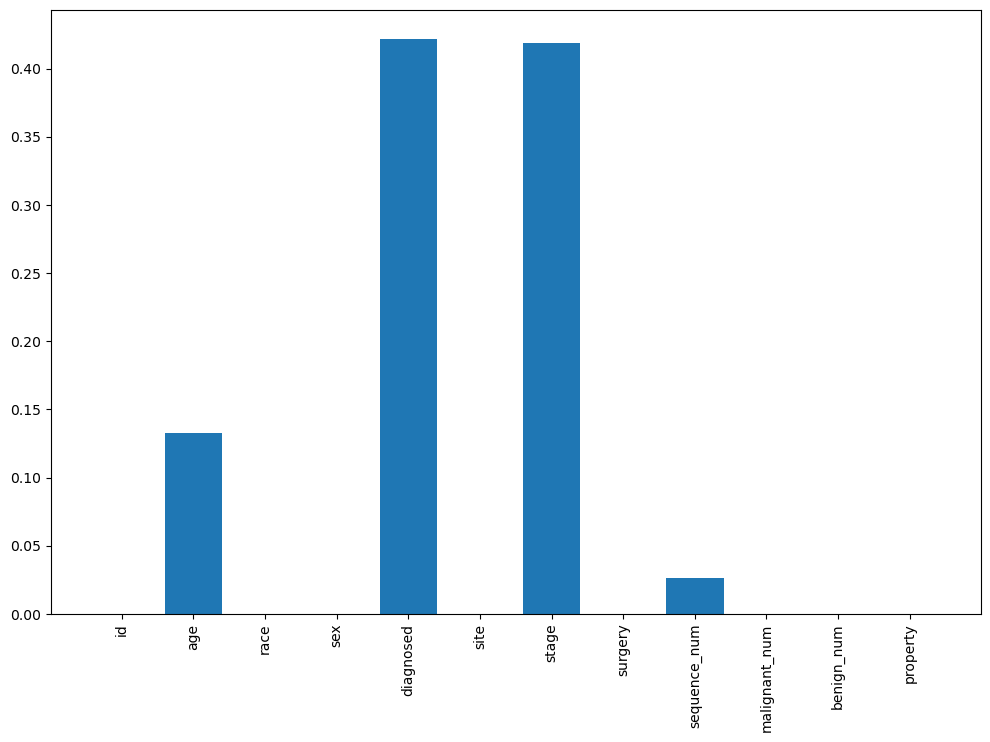

In [28]:
importance = dtree_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance, tick_label=['id','age', 'race', 'sex', 'diagnosed',
       'site', 'stage', 'surgery', 'sequence_num', 'malignant_num',
       'benign_num', 'property'])
plt.xticks(rotation='vertical')

## Logisticka regresija

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression(solver = 'lbfgs', max_iter=10000)
log_reg_clf = log_reg_clf.fit(features_nomalizovane, training['survive'])

print(classification_report(test['survive'], log_reg_clf.predict(test_features_nomalizovane)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         0
           4       0.59      0.50      0.54       149
           5       0.73      0.84      0.78       293

    accuracy                           0.69       466
   macro avg       0.22      0.22      0.22       466
weighted avg       0.65      0.69      0.66       466



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature: 0, Score: -0.39148
Feature: 1, Score: 0.42234
Feature: 2, Score: 0.16909
Feature: 3, Score: -0.82494
Feature: 4, Score: -0.19157
Feature: 5, Score: -0.17881
Feature: 6, Score: -0.16459
Feature: 7, Score: 0.03863
Feature: 8, Score: 0.26572
Feature: 9, Score: -0.15272
Feature: 10, Score: -0.00070
Feature: 11, Score: 0.56817


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'age'),
  Text(2, 0, 'race'),
  Text(3, 0, 'sex'),
  Text(4, 0, 'diagnosed'),
  Text(5, 0, 'site'),
  Text(6, 0, 'stage'),
  Text(7, 0, 'surgery'),
  Text(8, 0, 'sequence_num'),
  Text(9, 0, 'malignant_num'),
  Text(10, 0, 'benign_num'),
  Text(11, 0, 'property')])

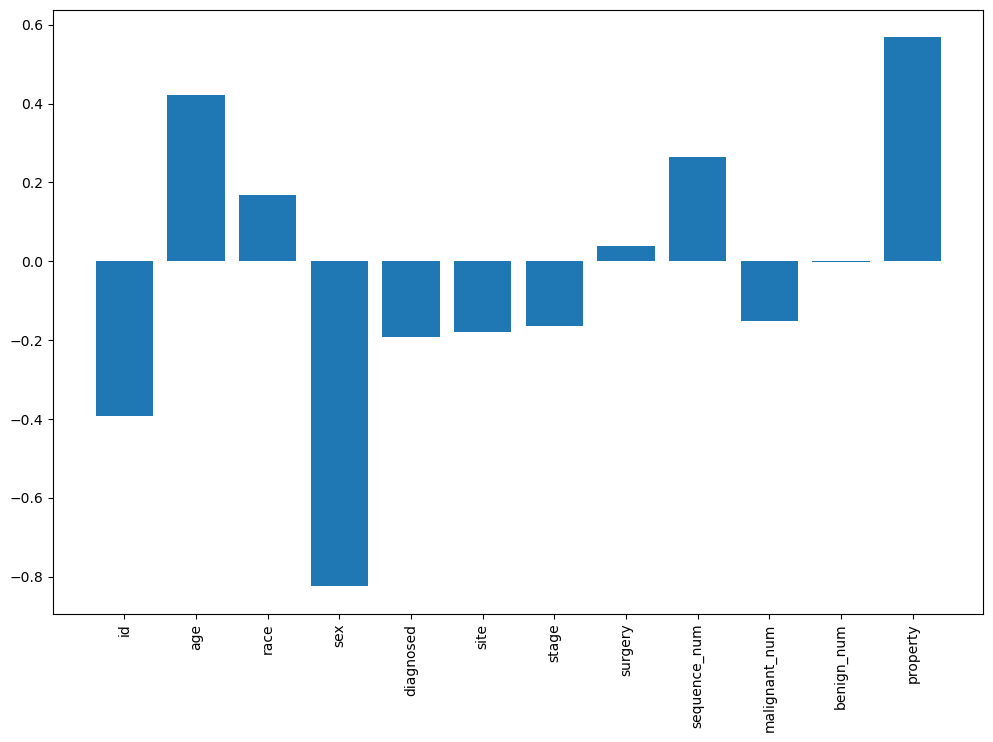

In [30]:
importance = log_reg_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance, tick_label=['id','age', 'race', 'sex', 'diagnosed',
       'site', 'stage', 'surgery', 'sequence_num', 'malignant_num',
       'benign_num', 'property'])
plt.xticks(rotation='vertical')

## XGBoost

In [31]:
import xgboost as xgb

dtrain = xgb.DMatrix(training[features], training['survive'].astype('category').cat.codes)
dtest = xgb.DMatrix(test[features], test['survive'].astype('category').cat.codes)

In [32]:
params = {
    'max_depth':10,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'objective':'multi:softmax',
    'num_class': 2,
    'eval_metric' : 'merror'
}